In [1]:
import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import xarray as xr
import xclim as xc
import numpy as np
import cmocean
import geopandas as gp

from unseen import fileio

## Shapefile

In [2]:
river_regions_file = '/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/river_regions/river_regions.shp'
river_regions = gp.read_file(river_regions_file)

In [3]:
nec_river_regions = river_regions[river_regions['Division'] == 'North East Coast']

In [4]:
cc_river_regions = river_regions[river_regions['Division'] == 'Carpentaria Coast']

## Day-by-day rainfall

In [5]:
agcd_file = '/g/data/xv83/agcd-csiro/precip/daily/precip-total_AGCD-CSIRO_r005_19110101-19111231_daily.nc'

In [6]:
ds = xr.open_dataset(agcd_file)

/jobfs/105817835.gadi-pbs/ipykernel_4055594/2634279623.py:10: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


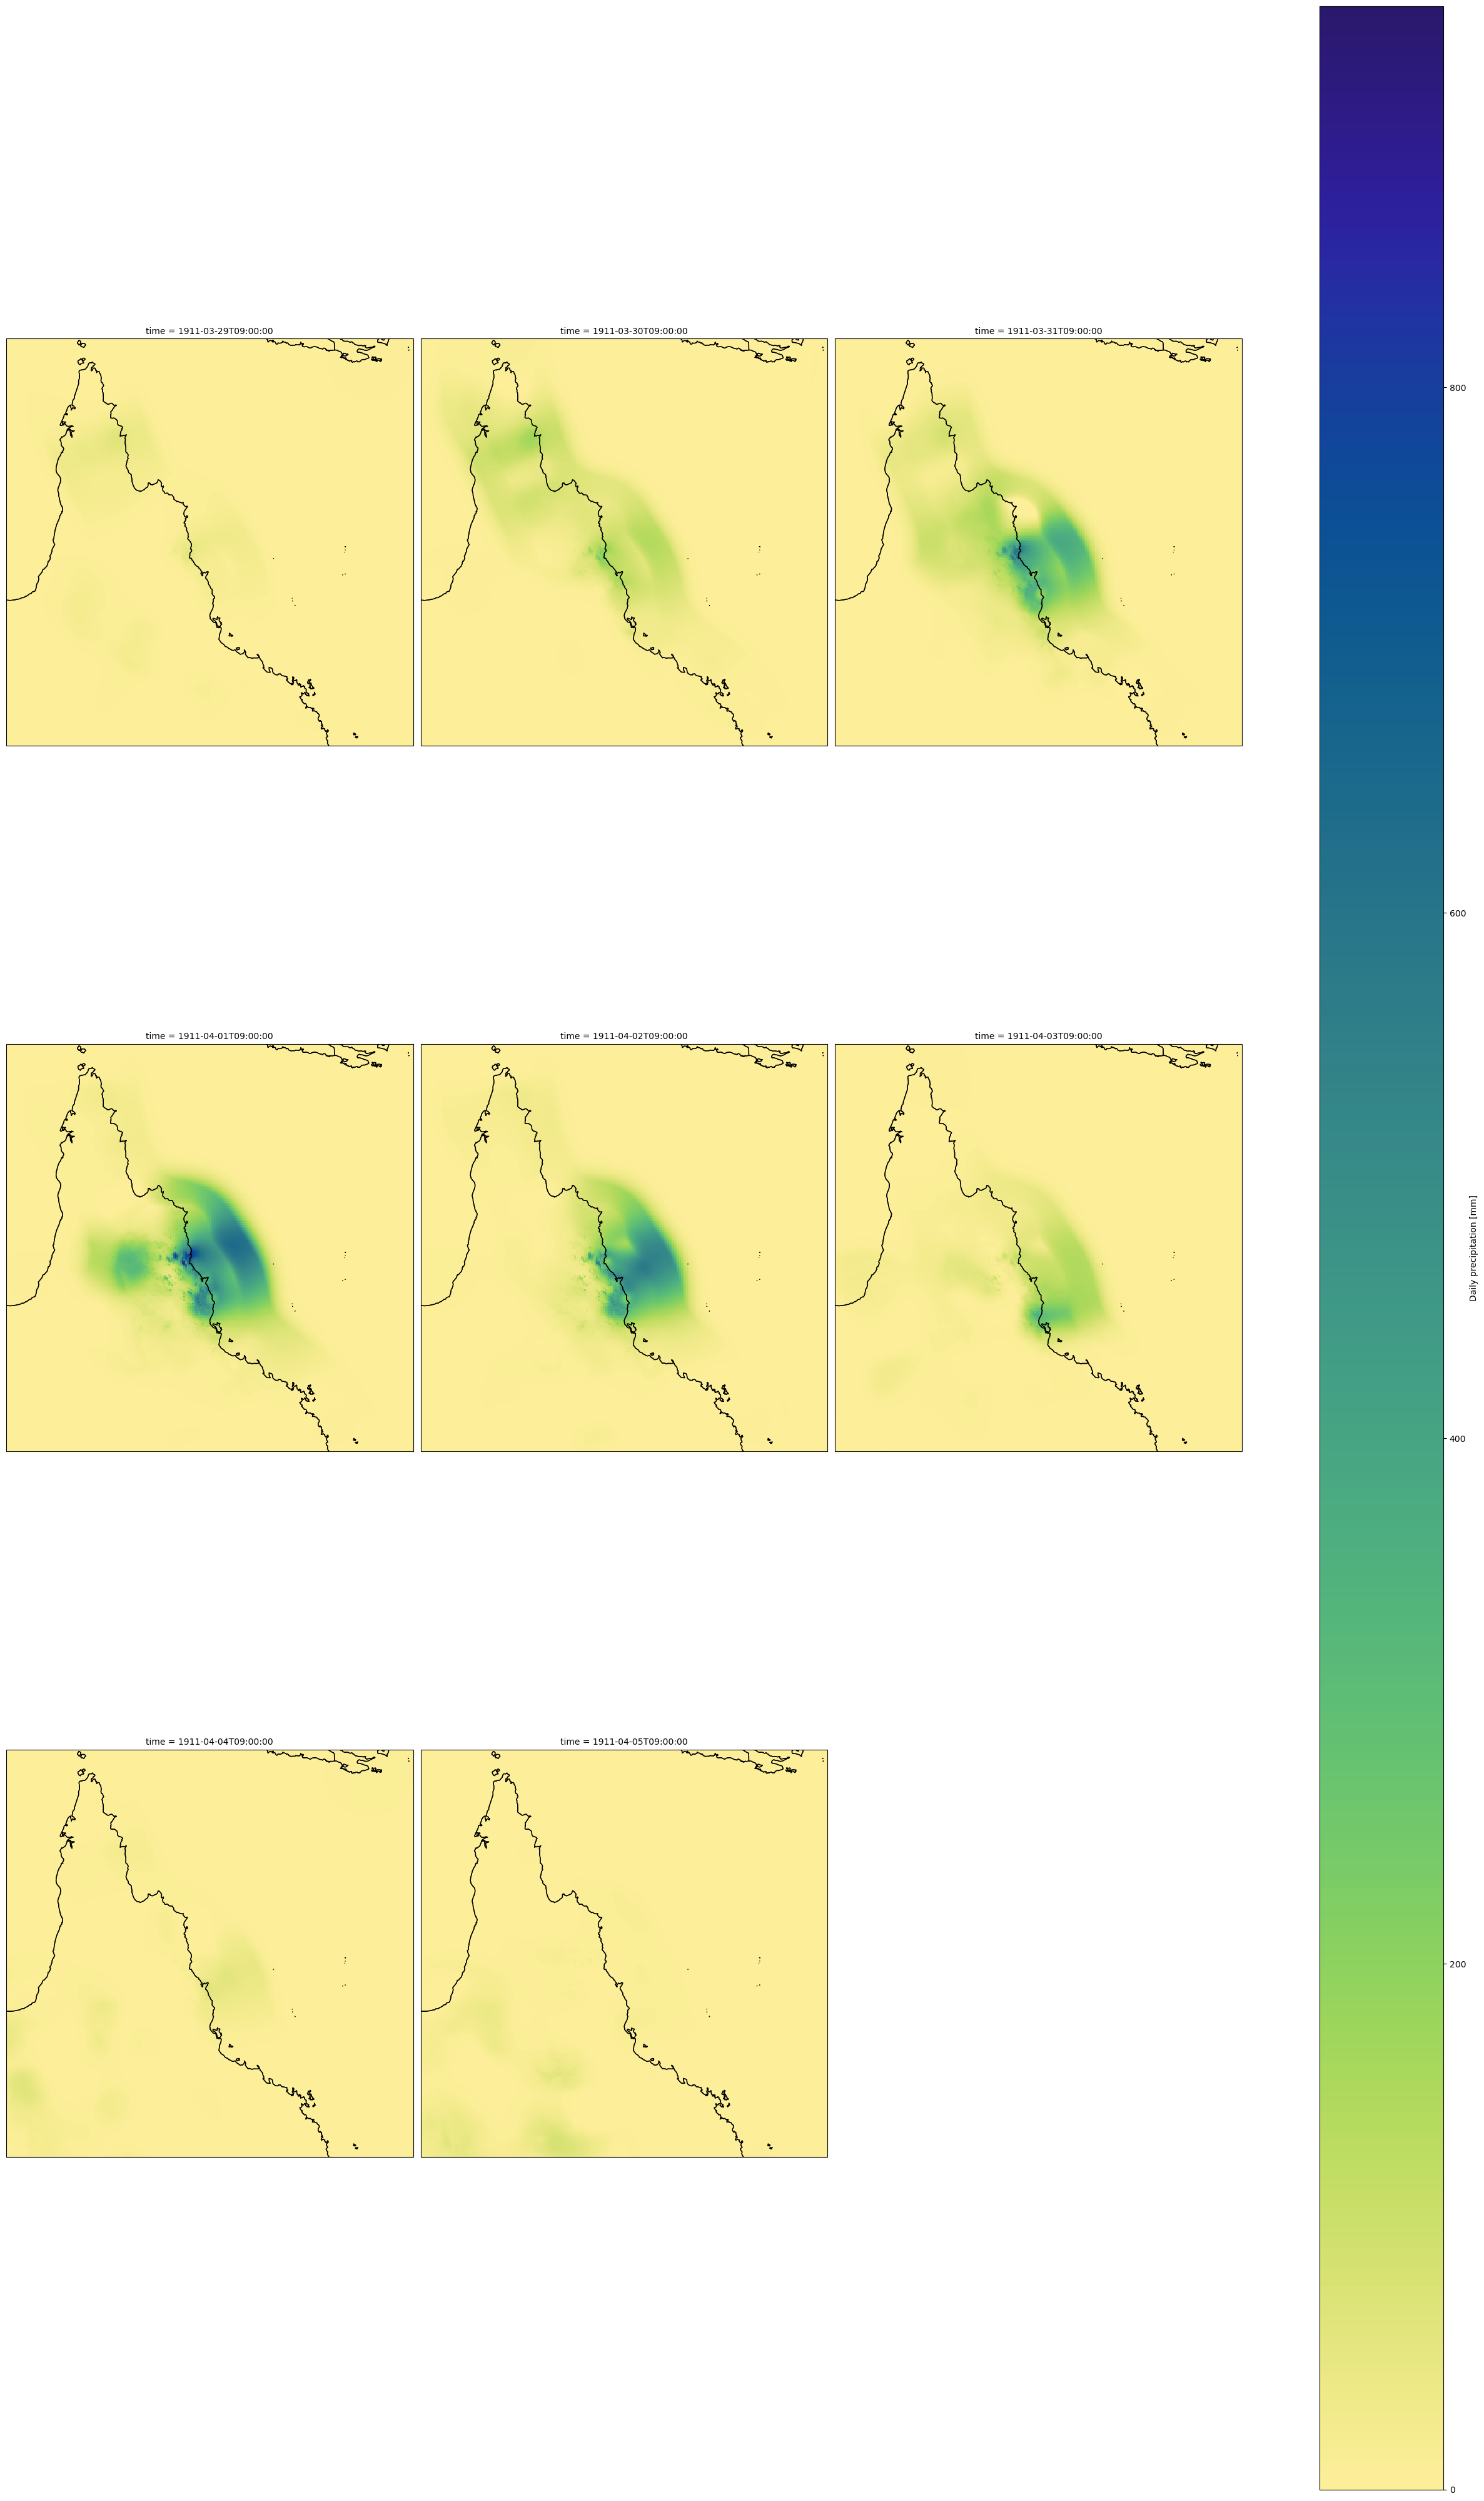

In [20]:
p = ds['precip'].sel(time=slice('1911-03-29', '1911-04-05')).plot(
    col='time',
    col_wrap=3,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    figsize=[25, 40],
    subplot_kws={"projection": ccrs.PlateCarree()},
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    ax.set_extent([140, 152, -10, -22], crs=ccrs.PlateCarree())

plt.savefig(
    'wet1911_day-by-day.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=100
)
    
plt.show()

## Event summary

In [8]:
ds_masked = fileio.open_dataset(
    agcd_file,
    shapefile='/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/australia/australia.shp'
)
precip_total_masked = ds_masked['precip'].sel(time=slice('1911-03-30', '1911-04-03')).sum(dim=['time'], min_count=1)

In [9]:
def plot_cities(ax, label_color='white'):
    lats = [-17.5328, -16.92, -16.484, -15.4758]
    lons = [146.0311, 145.77, 145.46, 145.2465]
    cities = ['Innisfail', 'Cairns', 'Port Douglas', 'Cooktown']
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'ro', zorder=5, transform=ccrs.PlateCarree())
        ax.text(
            lon + 0.2,
            lat,
            city,
            fontsize='large',
            color=label_color,
            transform=ccrs.PlateCarree()
        )

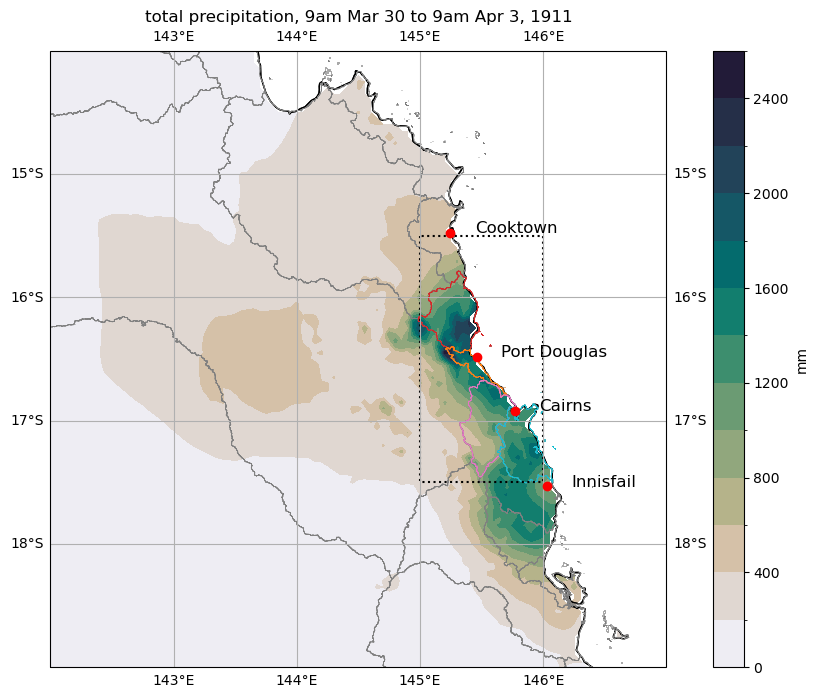

In [19]:
fig = plt.figure(figsize=[12, 8])
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())

pr_levels = np.arange(0, 2601, 200)
cmap = cmocean.cm.rain
# cmocean.cm.haline_r

precip_total_masked.plot.contourf(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=pr_levels,
    cbar_kwargs={'label': 'mm'},
)
ax1.coastlines()
ax1.add_feature(cartopy.feature.STATES)
ax1.add_geometries(
    nec_river_regions.geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='0.5',
)
ax1.add_geometries(
    cc_river_regions.geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='0.5',
)
ax1.add_geometries(
    nec_river_regions[nec_river_regions['RivRegName'] == 'DAINTREE RIVER'].geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='tab:red',
)
ax1.add_geometries(
    nec_river_regions[nec_river_regions['RivRegName'] == 'MOSSMAN RIVER'].geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='tab:orange',
)
ax1.add_geometries(
    nec_river_regions[nec_river_regions['RivRegName'] == 'BARRON RIVER'].geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='tab:pink',
)
ax1.add_geometries(
    nec_river_regions[nec_river_regions['RivRegName'] == 'MULGRAVE-RUSSELL RIVERS'].geometry,
    ccrs.PlateCarree(),
    facecolor='none',
    linewidth=0.5,
    edgecolor='tab:cyan',
)

ax1.gridlines(draw_labels=True)
ax1.plot(
    [145, 145, 146, 146, 145],
    [-15.5, -17.5, -17.5, -15.5, -15.5],
    transform=ccrs.PlateCarree(),
    color='black',
    linestyle=':'
)

ax1.set_extent([142, 147, -14, -19], crs=ccrs.PlateCarree())
plot_cities(ax1, label_color='black')
ax1.set_title('total precipitation, 9am Mar 30 to 9am Apr 3, 1911')

plt.savefig(
    'wet1911_5day_prtot.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=300
)
plt.show()